# Setup

In [481]:
%matplotlib inline
from pylab import *
import math

import detectorgeometry_trap as geom_trap
reload(geom_trap)

import decay_properties as decay
reload(decay)

<module 'decay_properties' from 'decay_properties.py'>

In [482]:
# example data input to class to determine effective area
theta_src = radians(60) #radians
phi_src = radians(180)
h = 35.5 #km
R = 6356. # km
ice =4
theta_view = radians(1) #degrees
N = 20000 # number of samples
E_nu = 18.5 #log energy in eV of incident neutrino 
E_cut = 14

geom_area = geom_trap.Area(theta_src,phi_src, h,R,theta_view, N)
A_deg, phi_e, theta_e, view_angle, exit_angle, norm, e_dot = geom_area.event_retention()
print A_deg

3.6994528188806606


In [483]:
# Assign to each event a tau energy, tau decay point, a decay probability, calculated view angle
# inputs : theta_src, ice, E_cut, e_dot, phi_e, t_e, rho, E_nu,h,R,view_cut, exit_angles
decay1 = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, norm,E_nu, h, R, theta_view, exit_angle, view_angle, A_deg)
                        

In [484]:
# ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_exit,\
# ret_view, ret_decay_angle, ret_fractions,ret_types, ret_p_exit = decay1.event_retention()

A_ret,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_exit,\
ret_view, ret_decay_angle, ret_fractions,ret_types, ret_p_exit = decay1.degree_eff_area()

# print A_ret, len(ret_e_dot)
# print ret_exit_obs,ret_exit_decay, ret_decay_obs

[1.13498287e-01 3.54168089e+00 1.22704856e-01 3.04170973e-01
 3.07540043e-01 2.55061135e-01 2.21444775e-02 1.35641108e+00
 3.31410668e-01 9.50534774e-01 1.56303231e-01 1.73749184e-01
 2.47875804e-01 8.92417311e-02 2.16031695e-01 1.22373541e-01
 1.35948076e+00 1.96375568e-02 4.20244331e-01 7.10902662e-02
 4.55673491e-02 1.34016451e-01 3.28503688e+00 2.59427798e-02
 2.29358942e-01 2.06352806e-03 4.33402545e-01 1.48501886e+00
 1.85261867e-01 4.14874569e-01 2.61524384e-01 3.96960431e-01
 1.25000735e+00 7.47027717e-01 3.16430494e-01 4.12480367e-01
 2.95106155e-01 1.50751237e-01 7.66475510e-01 2.34606565e-01
 2.10900639e-01 5.17611640e-02 1.47266750e-01 7.45156573e-02
 2.91108190e-01 2.28241486e-01 8.90267721e-01 2.50324413e-02
 3.04204093e-01 1.12507666e+00 3.04501898e-01 2.65465445e-02
 1.09312270e-01 1.76885717e-01 8.86332101e-01 3.36378544e-02
 2.23123366e-01 6.65313552e-01 6.27703047e-01]


## Adding RF cuts

In [513]:
f_lo = 480
f_high = 1200
Gain_dB = 100
Nphased = 1
view_cut = theta_view
exit_angles = ret_exit
view_angles = ret_view
decay_dist = ret_decay_dist
rho = ret_rho
E_t = ret_tau_energy

In [531]:
import trigger_properties as RF
reload(RF)

<module 'trigger_properties' from 'trigger_properties.py'>

In [532]:
trigger_result = RF.event_detection(A_ret, f_lo, f_high, Gain_dB, Nphased, 
                                    exit_angles,view_angles, ret_decay_angle, view_cut,
                                    ret_exit_obs,ret_exit_decay, ret_decay_obs,
                                    rho, E_t, R, ice, h, ret_t_e, ret_phi_e,theta_src,phi_src)

In [533]:
trigger_result.RF_eff_area()

[1.13498287e-01 3.54168089e+00 1.22704856e-01 3.04170973e-01
 3.07540043e-01 2.55061135e-01 2.21444775e-02 1.35641108e+00
 3.31410668e-01 9.50534774e-01 1.56303231e-01 1.73749184e-01
 2.47875804e-01 8.92417311e-02 2.16031695e-01 1.22373541e-01
 1.35948076e+00 1.96375568e-02 4.20244331e-01 7.10902662e-02
 4.55673491e-02 1.34016451e-01 3.28503688e+00 2.59427798e-02
 2.29358942e-01 2.06352806e-03 4.33402545e-01 1.48501886e+00
 1.85261867e-01 4.14874569e-01 2.61524384e-01 3.96960431e-01
 1.25000735e+00 7.47027717e-01 3.16430494e-01 4.12480367e-01
 2.95106155e-01 1.50751237e-01 7.66475510e-01 2.34606565e-01
 2.10900639e-01 5.17611640e-02 1.47266750e-01 7.45156573e-02
 2.91108190e-01 2.28241486e-01 8.90267721e-01 2.50324413e-02
 3.04204093e-01 1.12507666e+00 3.04501898e-01 2.65465445e-02
 1.09312270e-01 1.76885717e-01 8.86332101e-01 3.36378544e-02
 2.23123366e-01 6.65313552e-01 6.27703047e-01]
decay alt [5.60847793e-02 1.76649252e+00 6.11808091e-02 1.47330815e-01
 1.50730062e-01 1.25520614e-

0.0

## Creation of Graphs with Successive Effective Area Refinement

In [16]:
h = 37 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 100000 # number of samples
E_nu = 17 #log energy in eV of incident neutrino 
E_cut = 14
ice=4

# Creating a plot for the full range of possible source declinations 
start = 0 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=90 # divisions indeclination used to generate plot
x1 = np.linspace(-end,-start,steps)

A_g = []
A_P_exit = []
theta_view = radians(1)
for j in range(0,steps):
    print j
    theta = radians(start+(end-start)*float(j)/steps)
    geom_area = geom_trap.Area(theta,h,R,theta_view, N)
    geomA, phi_e, theta_e, view_angle, exit_angle, norm, e_dot = geom_area.event_retention()
    print geomA
    decay_sim = decay.tau_event(theta, ice, E_cut, e_dot, phi_e, theta_e, norm,E_nu, h, R, theta_view, exit_angle, geomA)
    A_PE = decay_sim.degree_eff_area()
    
    A_g.append(geomA)
    A_P_exit.append(A_PE)
    print A_PE



0
1.2952949901313744
0.0
1
1.3051887159596878
0.0
2
1.3301271337354308
0.0
3
1.3237446152350687
0.0
4
1.3283762592619148
0.0
5
1.2838187741612828
0.0
6
1.3338534499797159
0.0
7
1.3595365243260848
7.889847340438911e-08
8
1.357850399643222
0.0001629483924123089
9
1.3397066217830123
0.00033162468390600044
10
1.3753941132216096
9.042974702117307e-05
11
1.4007268921306666
0.0
12
1.3810155022747406
1.8087572497194052e-07
13
1.3782637556178745
0.00010633613033173895
14
1.3275629084499134
0.00024130812404944788
15
1.379832975620865
0.00015399900776286851
16
1.3821575241233894
2.6549417968609138e-05
17
1.3800343892812539
1.333272021394795e-07
18
1.4571383795563304
4.153699700586902e-05
19
1.5246768490723894
0.00013538195390315485
20
1.4449472611535283
9.386020670518991e-05
21
1.566550830131986
2.3564063435298562e-05
22
1.5599442067052876
0.00011647089425013348
23
1.5343365011189878
0.0002111801655730479
24
1.5693940122499512
5.622123216077779e-05
25
1.6037041988703178
3.552804917641383e-05
26
1

In [24]:
h = 37 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 100000 # number of samples
E_nu = 17 #log energy in eV of incident neutrino 
E_cut = 14
ice=4

# Creating a plot for the full range of possible source declinations 
start = 0 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=90 # divisions indeclination used to generate plot
x1 = np.linspace(-end,-start,steps)

A_P_exit_energy_decay = []
theta_view = radians(1)
for j in range(0,steps):
    print j
    theta = radians(start+(end-start)*float(j)/steps)
    geom_area = geom_trap.Area(theta,h,R,theta_view, N)
    geomA, phi_e, theta_e, view_angle, exit_angle, norm, e_dot = geom_area.event_retention()
    decay_sim = decay.tau_event(theta, ice, E_cut, e_dot, phi_e, theta_e, norm,E_nu, h, R, theta_view, exit_angle, geomA)
    A_PE_energy_decay = decay_sim.degree_eff_area()
    
    A_P_exit_energy_decay.append(A_PE_energy_decay)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


0.0 197.33017462570945


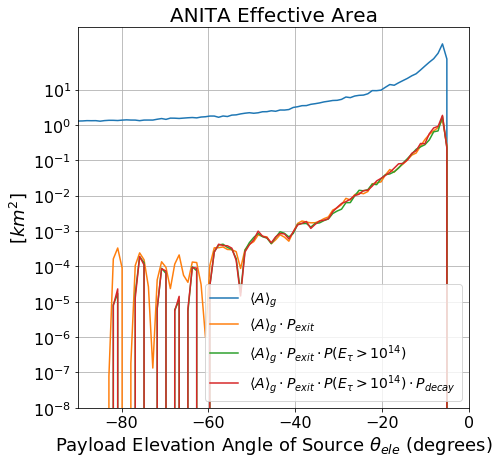

In [25]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(yscale='log')

ax.plot(x1, A_g)
ax.plot(x1, A_P_exit)
ax.plot(x1, A_P_exit_energy)
ax.plot(x1, A_P_exit_energy_decay)
    
#plt.fill_between(x2, sky_maps[0],sky_maps[1],color='tab:gray')
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.xlim(-90,0)  
legend = ax.legend([r'$\langle A \rangle_g$', 
                    r'$\langle A \rangle_g \cdot P_{exit}$', 
                    r'$\langle A \rangle_g \cdot P_{exit} \cdot P(E_\tau > 10^{14})$', 
                    r'$\langle A \rangle_g \cdot P_{exit} \cdot P(E_\tau > 10^{14}) \cdot P_{decay}$'
                   ], fontsize=14)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$[km^2]$', fontsize=18)
plt.title("ANITA Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

y_min = min(min(A_g),min(A_P_exit)
            ,min(A_P_exit_energy)
            , min(A_P_exit_energy_decay)
           )
y_max = max(max(A_g),max(A_P_exit) 
            ,max(A_P_exit_energy), 
            max(A_P_exit_energy_decay)
           )
print y_min, y_max
y_ticks = [10**x for x in range(int(round(math.log10(10**-8))),int(round(math.log10(y_max))))]
plt.yticks(y_ticks)
plt.grid(True,which='both')
#plt.semilogy()

In [3]:
print (5*10**15) * 641/(365*7)

1254403131115459
